In [35]:
from dolfin import *
import numpy as np

In [36]:
n_1=4
n_2=10
n_3=25
n_4=100

In [37]:
# Comencem amb n_1 = 5
# Definim una quadrícula 5x5 en un domini [0,1]x[0,1]
mesh = UnitSquareMesh(n_1, n_1)
V = FunctionSpace(mesh, "Lagrange", 1)

In [38]:
# Definim les funcions de  l'equació variacional, on x=x[0] i y=x[1]
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("-6*x[0]*x[1]*(1-x[1])+2*x[0]*x[0]*x[0]", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

In [39]:
# Definim les condicions de contorn, primer a l'esquerra i després a la dreta
def left_boundary(x):
    return x[0] < DOLFIN_EPS

u_L = Constant(0.0)
Gamma_L = DirichletBC(V, u_L, left_boundary)


def right_boundary(x):
    return x[0] > 1.0 - DOLFIN_EPS

u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)

# Recollim les dues condicions en una llista
bcs = [Gamma_L, Gamma_R]

In [40]:
# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

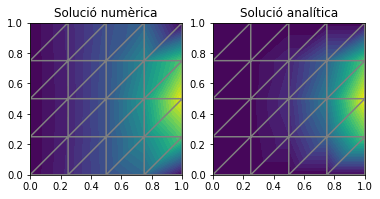

In [41]:
# Fem un plot de la solució
import matplotlib.pyplot as plt
plt.subplot(121)
plot(u)
plot(mesh)
plt.title("Solució numèrica")

# Representem ara la solució analítica és u_a(x,y)=y(1-y)x^3 
V2 = FunctionSpace(mesh, "Lagrange", 2)
u_a = Expression("x[1]*(1-x[1])*x[0]*x[0]*x[0]",degree=3)
u_a_V2 = interpolate(u_a,V2) # agafem els valors de u_a només a l'espai V2

plt.subplot(122)
plot(u_a_V2)
plot(mesh)
plt.title("Solució analítica")


plt.show()

In [42]:
# Calculem l'error en l'espai de funcions
V2 = FunctionSpace(mesh, "Lagrange", 2)
u_V2 = interpolate(u,V2)
error_f = (u_V2-u_a_V2)**2*dx #error a cada punt de l'àrea
error_mitj_f = sqrt(assemble(error_f))
e_max_f = np.abs(u_a_V2.vector().get_local() - u_V2.vector().get_local()).max()
print(f"Error en V : {error_mitj_f:.2e}")
print(f"Error màxim en V: {e_max_f:.2e}")


Error en V : 3.36e-02
Error màxim en V: 8.53e-02


In [43]:
# Calculem l'error
M=100
eix_x = np.linspace(0, 1, M)
eix_y = np.linspace(0,1,M)         
ey=[]
for i,x in enumerate(eix_x):
  exy = []
  for j,y in enumerate(eix_y):
    a = u(x,y) - u_a(x,y)
    ey.append(a)
  exy.append(ey)
e_max=np.amax(exy)
e_mitj=np.median(exy)
e_1=e_max
E_1=e_mitj
print(f"Error màxim : {e_max:.2e}")
print(f"Error mitjà : {e_mitj:.2e}")

Error màxim : 8.51e-02
Error mitjà : 2.94e-02


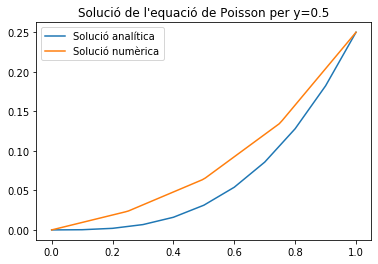

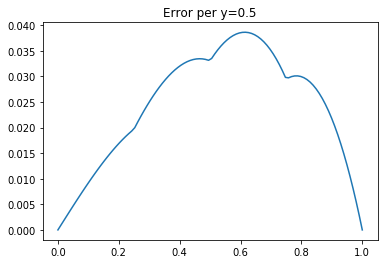

In [44]:
# Ara voldrem representar les funcions en 1 dimensió avaluant-les en y=0.5.
# Comencem amb la funció analítica
mesh_1d = IntervalMesh(10, 0, 1)
V_1d = FunctionSpace(mesh_1d, "Lagrange", 2)
u_a_y_05 = Expression("0.5*0.5*x[0]*x[0]*x[0]",degree=3)
u_a_05_V = interpolate(u_a_y_05,V_1d)
plot(u_a_05_V, label='Solució analítica')


# Ara amb la funció numèrica
u_y_05 = np.zeros(M)
for i, x in enumerate(eix_x):
    u_y_05[i] = u(x,0.5)

    
plt.plot(eix_x, u_y_05, label= 'Solució numèrica')
plt.legend()
plt.title("Solució de l'equació de Poisson per y=0.5")
plt.show()

# Representem ara la diferència entre les dos funcions

error_05 = np.zeros(M)
for i, x in enumerate(eix_x):
    error_05[i] = u_y_05[i] - u_a_y_05(x)
plt.plot(eix_x, error_05)
plt.title("Error per y=0.5")

plt.show()


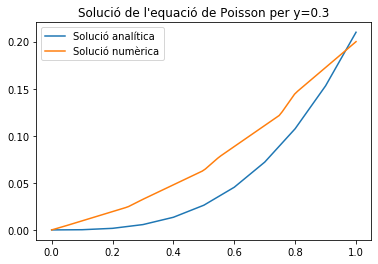

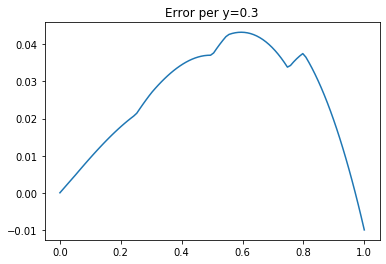

In [45]:
# Ara voldrem representar les funcions en 1 dimensió avaluant-les en y=0.3.
# Comencem amb la funció analítica
mesh_1d = IntervalMesh(10, 0, 1)
V_1d = FunctionSpace(mesh_1d, "Lagrange", 2)
u_a_y_03 = Expression("0.3*0.7*x[0]*x[0]*x[0]",degree=3)
u_a_03_V = interpolate(u_a_y_03,V_1d)
plot(u_a_03_V, label='Solució analítica')


# Ara amb la funció numèrica
eix_x = np.linspace(0, 1, M)
u_y_03 = np.zeros(M)

for i, x in enumerate(eix_x):
    u_y_03[i] = u(x,0.3)

plt.plot(eix_x, u_y_03, label= 'Solució numèrica')
plt.title("Solució de l'equació de Poisson per y=0.3")
plt.legend()
plt.show()

# Representem ara la diferència entre les dos funcions

error_03 = np.zeros(M)
for i, x in enumerate(eix_x):
    error_03[i] = u_y_03[i] - u_a_y_03(x)
plt.plot(eix_x, error_03)
plt.title("Error per y=0.3")
plt.show()


In [46]:
# ___________________________________________________________________________________________________________________________
# n_2 = 10

# Definim una quadrícula 10x10 en un domini [0,1]x[0,1]

mesh = UnitSquareMesh(n_2, n_2)
V = FunctionSpace(mesh, "Lagrange", 1)

# Definim les funcions de  l'equació variacional, on x=x[0] i y=x[1]
u = TrialFunction(V)
v = TestFunction(V)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

# Definim les condicions de contorn, primer a l'esquerra i després a la dreta
Gamma_L = DirichletBC(V, u_L, left_boundary)
u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Calculem l'error màxim i mitjà
for i,x in enumerate(eix_x):
  exy = []
  for j,y in enumerate(eix_y):
    a = u(x,y) - u_a(x,y)
    ey.append(a)
  exy.append(ey)
e_max=np.amax(exy)
e_mitj=np.median(exy)
e_2=e_max
E_2=e_mitj



In [47]:
# ___________________________________________________________________________________________________________________________
# n_3 = 25

mesh = UnitSquareMesh(n_3, n_3)
V = FunctionSpace(mesh, "Lagrange", 1)

# Definim les funcions de  l'equació variacional, on x=x[0] i y=x[1]
u = TrialFunction(V)
v = TestFunction(V)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

# Definim les condicions de contorn, primer a l'esquerra i després a la dreta
Gamma_L = DirichletBC(V, u_L, left_boundary)
u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Calculem l'error màxim i mitjà
for i,x in enumerate(eix_x):
  exy = []
  for j,y in enumerate(eix_y):
    a = u(x,y) - u_a(x,y)
    ey.append(a)
  exy.append(ey)
e_max=np.amax(exy)
e_mitj=np.median(exy)
e_3=e_max
E_3=e_mitj



print(E_3)


0.0308090665705


In [48]:
# ___________________________________________________________________________________________________________________________
# n_4 = 10

mesh = UnitSquareMesh(n_3, n_3)
V = FunctionSpace(mesh, "Lagrange", 1)

# Definim les funcions de  l'equació variacional, on x=x[0] i y=x[1]
u = TrialFunction(V)
v = TestFunction(V)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

# Definim les condicions de contorn, primer a l'esquerra i després a la dreta
Gamma_L = DirichletBC(V, u_L, left_boundary)
u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Calculem l'error màxim i mitjà
for i,x in enumerate(eix_x):
  exy = []
  for j,y in enumerate(eix_y):
    a = u(x,y) - u_a(x,y)
    ey.append(a)
  exy.append(ey)
e_max=np.amax(exy)
e_mitj=np.median(exy)
e_4=e_max
E_4=e_mitj

print(E_4)


0.0310255386781


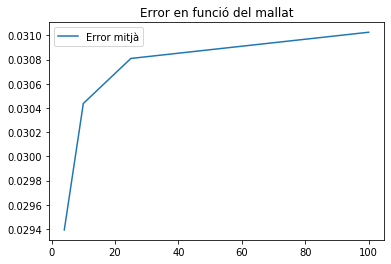

In [49]:
N=[n_1,n_2,n_3,n_4]
e_mitj_1=[E_1,E_2,E_3,E_4] #llista dels diferents errors màxims en funció de les divisions de la quadrícula
plt.plot(N,e_mitj_1,label='Error mitjà')
plt.title("Error en funció del mallat")
plt.legend()
plt.show()

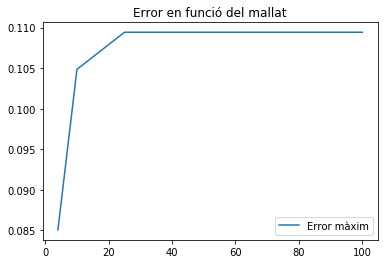

In [50]:
e_max_1=[e_1,e_2,e_3,e_4] #llista dels diferents errors màxims en funció de les divisions de la quadrícula
plt.plot(N,e_max_1,label='Error màxim')
plt.title("Error en funció del mallat")
plt.legend()
plt.show()

In [31]:
# Ara veurem l'efecte que té el grau de l'espai de funcions
# ___________________________________________________________________________________________________________________________
# n_1 = 5

# Definim una quadrícula 5x5 en un domini [0,1]x[0,1]

mesh = UnitSquareMesh(n_1, n_1)
V = FunctionSpace(mesh, "Lagrange", 2)
u = TrialFunction(V)
v = TestFunction(V)
a = inner(grad(u), grad(v))*dx
L = f*v*dx
Gamma_L = DirichletBC(V, u_L, left_boundary)
u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)
bcs = [Gamma_L, Gamma_R]
u = Function(V)
solve(a == L, u, bcs)
for i,x in enumerate(eix_x):
  exy = []
  for j,y in enumerate(eix_y):
    a = u(x,y) - u_a(x,y)
    ey.append(a)
  exy.append(ey)
e_max=np.amax(exy)
e_mitj=np.median(exy)
e_1=e_max
E_1=e_mitj




# ___________________________________________________________________________________________________________________________
# n_2 = 10

mesh = UnitSquareMesh(n_2, n_2)
V = FunctionSpace(mesh, "Lagrange", 2)
u = TrialFunction(V)
v = TestFunction(V)
a = inner(grad(u), grad(v))*dx
L = f*v*dx
Gamma_L = DirichletBC(V, u_L, left_boundary)
u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)
bcs = [Gamma_L, Gamma_R]
u = Function(V)
solve(a == L, u, bcs)
for i,x in enumerate(eix_x):
  exy = []
  for j,y in enumerate(eix_y):
    a = u(x,y) - u_a(x,y)
    ey.append(a)
  exy.append(ey)
e_max=np.amax(exy)
e_mitj=np.median(exy)
e_2=e_max
E_2=e_mitj

# ___________________________________________________________________________________________________________________________
# n_3 = 25

# Definim una quadrícula x100 en un domini [0,1]x[0,1]
mesh = UnitSquareMesh(n_3, n_3)
V = FunctionSpace(mesh, "Lagrange", 2)
u = TrialFunction(V)
v = TestFunction(V)
a = inner(grad(u), grad(v))*dx
L = f*v*dx
Gamma_L = DirichletBC(V, u_L, left_boundary)
u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)
bcs = [Gamma_L, Gamma_R]
u = Function(V)
solve(a == L, u, bcs)
for i,x in enumerate(eix_x):
  exy = []
  for j,y in enumerate(eix_y):
    a = u(x,y) - u_a(x,y)
    ey.append(a)
  exy.append(ey)
e_max=np.amax(exy)
e_mitj=np.median(exy)
e_3=e_max
E_3=e_mitj

# ___________________________________________________________________________________________________________________________
# n_4 = 100
mesh = UnitSquareMesh(n_4, n_4)
V = FunctionSpace(mesh, "Lagrange", 2)
u = TrialFunction(V)
v = TestFunction(V)
a = inner(grad(u), grad(v))*dx
L = f*v*dx
Gamma_L = DirichletBC(V, u_L, left_boundary)
u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)
bcs = [Gamma_L, Gamma_R]
u = Function(V)
solve(a == L, u, bcs)
for i,x in enumerate(eix_x):
  exy = []
  for j,y in enumerate(eix_y):
    a = u(x,y) - u_a(x,y)
    ey.append(a)
  exy.append(ey)
e_max=np.amax(exy)
e_mitj=np.median(exy)
e_4=e_max
E_4=e_mitj





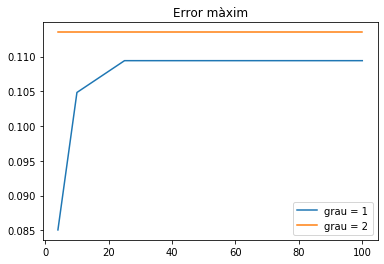

In [33]:
e_max_2=[e_1,e_2,e_3,e_4] #llista dels diferents errors màxims en funció de les divisions de la quadrícula
plt.plot(N,e_max_1, label = 'grau = 1')
plt.plot(N,e_max_2, label = 'grau = 2')
plt.legend()
plt.title('Error màxim')
plt.show()


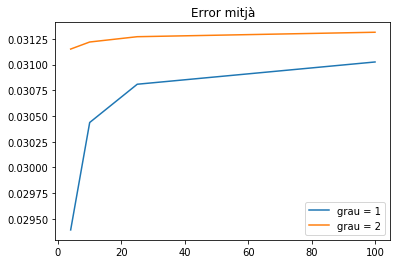

In [34]:
e_mitj_2=[E_1,E_2,E_3,E_4] #llista dels diferents errors màxims en funció de les divisions de la quadrícula
plt.plot(N,e_mitj_1, label = 'grau = 1')
plt.plot(N,e_mitj_2, label = 'grau = 2')
plt.legend()
plt.title('Error mitjà')
plt.show()